In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

import xml.etree.ElementTree as ET

ModuleNotFoundError: No module named 'numpy'

In [12]:
# 画像のあるディレクトリ##########################################
#train_img_dirs = ['nat','neji_25','washer', '1', '2', '3']
train_img_dirs = os.listdir("../data")
print(train_img_dirs)

NUM_CLASSES = len(train_img_dirs) # 分類するクラス数
#print(NUM_CLASSES)
IMG_SIZE = 28 # 画像の1辺の長さ

['neji_10', 'neji_40', 'nat', 'washer', 'neji_25']


In [13]:
# 学習画像データ
images = []
# 学習データのラベル
labels = []

for i, d in enumerate(train_img_dirs):
    # ./data/以下の各ディレクトリ内のファイル名取得
    files = os.listdir('../data/' + d)
    for f in files:
        # 画像読み込み
        img = cv2.imread('../data/' + d + '/' + f)
        # 1辺がIMG_SIZEの正方形にリサイズ
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        # 1列にして ####この処理はなくす
        img = img.flatten().astype(np.float32)/255.0
        images.append(img)

        # one_hot_vectorを作りラベルとして追加 ######変更
        #tmp = np.zeros(NUM_CLASSES)
        #tmp[i] = 1
        tmp = i
        labels.append(tmp)
# numpy配列に変換
images = np.asarray(images)
labels = np.asarray(labels)

labels = labels[:1000]
print(len(images), len(labels))

#train_images = train_images[:1000].reshape(-1, IMG_SIZE * IMG_SIZE) / 255.0
#test_images = test_images[:1000].reshape(-1, IMG_SIZE * IMG_SIZE) / 255.0
#print(len(train_images), len(train_labels))

20 20


In [37]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os

import tensorflow as tf
from tensorflow import keras

tf.__version__

import matplotlib.pyplot as plt

In [38]:
# 短いシーケンシャルモデルを返す関数
def create_model():
  model = tf.keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(IMG_SIZE*IMG_SIZE*3,)),#784
    #keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(IMG_SIZE,IMG_SIZE,3)),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation=tf.keras.activations.softmax)
  ])

  model.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.sparse_categorical_crossentropy,
                metrics=['accuracy'])
  return model

# 基本的なモデルのインスタンスを作る
model = create_model()
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               1204736   
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                5130      
Total params: 1,209,866
Trainable params: 1,209,866
Non-trainable params: 0
_________________________________________________________________


In [58]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
# チェックポイントコールバックを作る
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

model = create_model()

stratifiedkfold = StratifiedKFold(n_splits=3)

loss_datas = []
acc_datas =[]
test_images = []
test_labels = []

for train_index, test_index in stratifiedkfold.split(images, labels):
    model = create_model()
    model.fit(images[train_index], labels[train_index],  epochs = 50,#10
              validation_data = (images[test_index],labels[test_index]),
              callbacks = [cp_callback])  # 訓練にコールバックを渡す
    loss,acc = model.evaluate(images[test_index],labels[test_index])
    test_images, test_labels = images[test_index] , labels[test_index]
    loss_datas.append(loss)
    acc_datas.append(acc)


W0807 14:35:30.232349 140367846393664 util.py:144] Unresolved object in checkpoint: (root).optimizer.iter
W0807 14:35:30.233600 140367846393664 util.py:144] Unresolved object in checkpoint: (root).optimizer.beta_1
W0807 14:35:30.234514 140367846393664 util.py:144] Unresolved object in checkpoint: (root).optimizer.beta_2
W0807 14:35:30.235301 140367846393664 util.py:144] Unresolved object in checkpoint: (root).optimizer.decay
W0807 14:35:30.237505 140367846393664 util.py:144] Unresolved object in checkpoint: (root).optimizer.learning_rate
W0807 14:35:30.238250 140367846393664 util.py:144] Unresolved object in checkpoint: (root).optimizer's state 'm' for (root).layer_with_weights-0.kernel
W0807 14:35:30.238988 140367846393664 util.py:144] Unresolved object in checkpoint: (root).optimizer's state 'm' for (root).layer_with_weights-0.bias
W0807 14:35:30.239612 140367846393664 util.py:144] Unresolved object in checkpoint: (root).optimizer's state 'm' for (root).layer_with_weights-1.kernel
W0

Train on 12 samples, validate on 8 samples
Epoch 1/50

Epoch 00001: saving model to training_1/cp.ckpt
12/12 [==============================] - 1s 43ms/sample - loss: 3.5629 - acc: 0.0000e+00 - val_loss: 3.8609 - val_acc: 0.2500
Epoch 2/50

Epoch 00002: saving model to training_1/cp.ckpt
12/12 [==============================] - 0s 34ms/sample - loss: 3.0705 - acc: 0.3333 - val_loss: 3.0715 - val_acc: 0.2500
Epoch 3/50

Epoch 00003: saving model to training_1/cp.ckpt
12/12 [==============================] - 0s 4ms/sample - loss: 3.1685 - acc: 0.2500 - val_loss: 3.5895 - val_acc: 0.2500
Epoch 4/50

Epoch 00004: saving model to training_1/cp.ckpt
12/12 [==============================] - 0s 23ms/sample - loss: 3.5501 - acc: 0.2500 - val_loss: 3.1734 - val_acc: 0.2500
Epoch 5/50

Epoch 00005: saving model to training_1/cp.ckpt
12/12 [==============================] - 0s 12ms/sample - loss: 3.7937 - acc: 0.1667 - val_loss: 2.0047 - val_acc: 0.3750
Epoch 6/50

Epoch 00006: saving model to tra

Epoch 46/50

Epoch 00046: saving model to training_1/cp.ckpt
12/12 [==============================] - 0s 7ms/sample - loss: 0.0856 - acc: 1.0000 - val_loss: 2.5387 - val_acc: 0.6250
Epoch 47/50

Epoch 00047: saving model to training_1/cp.ckpt
12/12 [==============================] - 0s 16ms/sample - loss: 0.1260 - acc: 1.0000 - val_loss: 2.4637 - val_acc: 0.6250
Epoch 48/50

Epoch 00048: saving model to training_1/cp.ckpt
12/12 [==============================] - 0s 12ms/sample - loss: 0.0380 - acc: 1.0000 - val_loss: 2.4070 - val_acc: 0.6250
Epoch 49/50

Epoch 00049: saving model to training_1/cp.ckpt
12/12 [==============================] - 0s 12ms/sample - loss: 0.0795 - acc: 1.0000 - val_loss: 2.3702 - val_acc: 0.6250
Epoch 50/50

Epoch 00050: saving model to training_1/cp.ckpt
8/8 [==============================] - 0s 737us/sample - loss: 2.3571 - acc: 0.6250
Train on 13 samples, validate on 7 samples
Epoch 1/50

Epoch 00001: saving model to training_1/cp.ckpt
13/13 [==============

Epoch 41/50

Epoch 00041: saving model to training_1/cp.ckpt
13/13 [==============================] - 0s 32ms/sample - loss: 0.1563 - acc: 0.9231 - val_loss: 0.9932 - val_acc: 0.4286
Epoch 42/50

Epoch 00042: saving model to training_1/cp.ckpt
13/13 [==============================] - 0s 6ms/sample - loss: 0.3489 - acc: 0.8462 - val_loss: 1.0078 - val_acc: 0.4286
Epoch 43/50

Epoch 00043: saving model to training_1/cp.ckpt
13/13 [==============================] - 0s 11ms/sample - loss: 0.1530 - acc: 1.0000 - val_loss: 1.1111 - val_acc: 0.7143
Epoch 44/50

Epoch 00044: saving model to training_1/cp.ckpt
13/13 [==============================] - 0s 16ms/sample - loss: 0.0916 - acc: 1.0000 - val_loss: 1.2320 - val_acc: 0.7143
Epoch 45/50

Epoch 00045: saving model to training_1/cp.ckpt
13/13 [==============================] - 0s 14ms/sample - loss: 0.1225 - acc: 1.0000 - val_loss: 1.2801 - val_acc: 0.7143
Epoch 46/50

Epoch 00046: saving model to training_1/cp.ckpt
13/13 [==================

15/15 [==============================] - 0s 19ms/sample - loss: 0.1818 - acc: 0.9333 - val_loss: 3.4239 - val_acc: 0.4000
Epoch 36/50

Epoch 00036: saving model to training_1/cp.ckpt
15/15 [==============================] - 0s 16ms/sample - loss: 0.0244 - acc: 1.0000 - val_loss: 3.2050 - val_acc: 0.4000
Epoch 37/50

Epoch 00037: saving model to training_1/cp.ckpt
15/15 [==============================] - 0s 11ms/sample - loss: 0.0133 - acc: 1.0000 - val_loss: 3.2046 - val_acc: 0.4000
Epoch 38/50

Epoch 00038: saving model to training_1/cp.ckpt
15/15 [==============================] - 0s 13ms/sample - loss: 0.0299 - acc: 1.0000 - val_loss: 3.2811 - val_acc: 0.4000
Epoch 39/50

Epoch 00039: saving model to training_1/cp.ckpt
15/15 [==============================] - 0s 30ms/sample - loss: 0.1169 - acc: 0.9333 - val_loss: 3.3062 - val_acc: 0.4000
Epoch 40/50

Epoch 00040: saving model to training_1/cp.ckpt
15/15 [==============================] - 0s 6ms/sample - loss: 0.0389 - acc: 1.0000 -

In [62]:
print(loss_datas)

[2.357084035873413, 0.9404516220092773, 3.9525997638702393]


In [60]:
print(acc_datas)

[0.625, 0.5714286, 0.4]


In [61]:
print(np.mean(acc_datas))

0.5321428


In [42]:
!ls {checkpoint_dir}

checkpoint		     cp.ckpt.data-00001-of-00002
cp.ckpt.data-00000-of-00002  cp.ckpt.index


inputファイルを参照

In [69]:
input_images = []
input_labels = []
test_img_dirs = os.listdir("../input_data")
for i, d in enumerate(test_img_dirs):
    # ./data/以下の各ディレクトリ内のファイル名取得
    files = os.listdir('../input_data/' + d)
    for f in files:
        # 画像読み込み
        img = cv2.imread('../input_data/' + d + '/' + f)
        # 1辺がIMG_SIZEの正方形にリサイズ
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        # 1列にして ####この処理はなくす
        img = img.flatten().astype(np.float32)/255.0
        input_images.append(img)

        # one_hot_vectorを作りラベルとして追加 ######変更
        #tmp = np.zeros(NUM_CLASSES)
        #tmp[i] = 1
        tmp = i
        input_labels.append(tmp)
# numpy配列に変換
input_images = np.asarray(input_images)
input_labels = np.asarray(input_labels)

input_labels = input_labels[:1000]
print(len(input_images), len(input_labels))

test_images = input_images
test_labels = input_labels

1 1


学習データがない場合

In [70]:
model = create_model()

loss, acc = model.evaluate(test_images, test_labels)
print("Untrained model, accuracy: {:5.2f}%".format(100*acc))

1/1 [==============================] - 0s 100ms/sample - loss: 1.9322 - acc: 0.0000e+00
Untrained model, accuracy:  0.00%


学習データがある場合

In [71]:
model.load_weights(checkpoint_path)
loss,acc = model.evaluate(test_images, test_labels)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

1/1 [==============================] - 0s 1ms/sample - loss: 0.1271 - acc: 1.0000
Restored model, accuracy: 100.00%


In [72]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(train_img_dirs[predicted_label],
                                    100*np.max(predictions_array),
                                    train_img_dirs[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [73]:
predictions = model.predict(test_images)
for i in range(len(predictions)):
    print("result: ",train_img_dirs[np.argmax(predictions[i])].rjust(6),"     answer:",train_img_dirs[test_labels[i]].rjust(6))

result:  neji_40      answer: neji_40


IndexError: index 1 is out of bounds for axis 0 with size 1

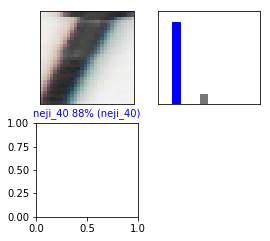

In [74]:
test_images_fig = []
for i in range(len(test_images)):
    test_images_fig.append(np.reshape(test_images[i], (IMG_SIZE,IMG_SIZE,3)))
num_rows = NUM_CLASSES
num_cols = 1
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images_fig)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

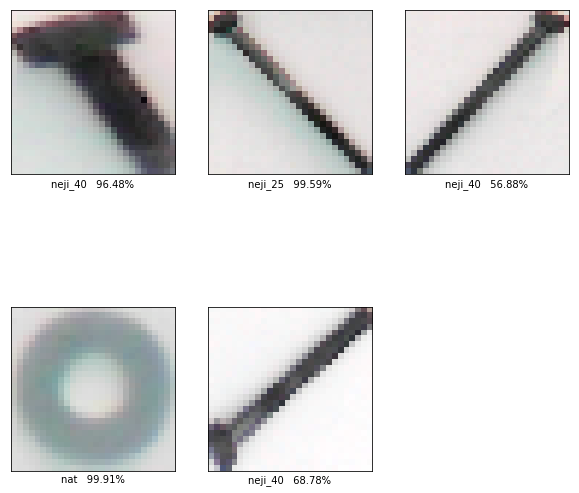

In [68]:
plt.figure(figsize=(10,10))
np.set_printoptions(precision=0)
for i in range(len(test_images_fig)):
    plt.subplot((len(test_images_fig)/3)+1,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images_fig[i], cmap=plt.cm.binary)
    #plt.xlabel(train_img_dirs[test_labels[i]])
    plt.xlabel("{}   {:.2f}%".format(train_img_dirs[np.argmax(predictions[i])], 
                                         100*np.amax(predictions[i]))
              )
plt.show()

In [26]:
# ファイル名に(`str.format`を使って)エポック数を埋め込みます
#checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
#checkpoint_dir = os.path.dirname(checkpoint_path)

#cp_callback = tf.keras.callbacks.ModelCheckpoint(
#    checkpoint_path, verbose=1, save_weights_only=True,
    # 重みを5エポックごとに保存します
#    period=5)

#model = create_model()
#model.fit(train_images, train_labels,
#          epochs = 100, callbacks = [cp_callback],
#          validation_data = (test_images,test_labels),
#          verbose=0)
